<font size=7> Social distancing: evidence of privilege in a pandemic from smartphones </font><br>
Nabarun Dasgupta, MPH, PhD | nab@unc.edu | @nabarund<br>
*Dr. Dasgupta is an epidemiologist at the University of North Carolina in Chapel Hill. He studies population level patterns of infectious disease, medication safety, and opioids.*<br>
Thanks to Ben White for data munging help. Code available on [GitHub](https://github.com/opioiddatalab/covid).

In [758]:
display "Notebook generated on $S_DATE at $S_TIME ET"

Notebook generated on 16 Apr 2020 at 09:34:29 ET


On March 23, 2020 Stuart Thompson and Yaryna Serkez of *The New York Times* [published](https://www.nytimes.com/interactive/2020/03/23/opinion/coronavirus-economy-recession.html) a fascinating use of cell phone GPS signal information to gauge movement and commuting, during the advent of social distancing. They compared the state-level data in a [slick graphic](https://www.nytimes.com/interactive/2020/03/23/opinion/coronavirus-economy-recession.html) to political leanings. But we wanted to understand more about other community level characteristics of slow versus fast adopters.<br>
<br>
We were provided access to the same location dataset on social distancing published today in the. We used a data merging approach we have [previously published](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6339867/). Repurposing code from an ongoing project, we merged in community-level data from the Robert Wood Johnson Foundation's [County Health Rankings](https://www.countyhealthrankings.org/). This very rich dataset contains dozens of explanatory variables about health, social, and economic indicators.<br>


In [759]:
// Load pre-procesed data
clear all
set scheme economist
use "https://github.com/opioiddatalab/covid/blob/master/analysiset.dta?raw=true"

// Basic distributions of 
tab rucc, m
tab iso5, m
table iso5, c(sum last3_sample)
su last3_sample
di "Total 3-day mobile traces: " r(sum)

// Set up reporting output programs 
program define pdiff
    version 16
    qui: lincom (levels5-levels1), ef
    local d=r(estimate)
    local se=r(se)
    di "Percent difference (high-low): " round(((`d'-1)*100),.1) "% (95% CI: " round((((`d'-1)*100)-(1.96*`se')),.1) "%, " round((((`d'-1)*100)+(1.96*`se')),.1) "%)"
end

program define topdiff
    version 16
    qui: lincom (levels5-levels4), ef
    local d=r(estimate)
    local se=r(se)
    di "Percent difference (1st vs. 2nd quintile): " round(((`d'-1)*100),.1) "% (95% CI: " round((((`d'-1)*100)-(1.96*`se')),.1) "%, " round((((`d'-1)*100)+(1.96*`se')),.1) "%)"
end

// Create results frame
frame create results str20 strat level avg LL UL

// Set up program for main models
program define modelrun, rclass
    version 16
    syntax varlist(numeric)
    
    frame change default
    foreach var of local varlist {
        *table iso5, c(count pcp_rate mean pcp_rate sem pcp_rate) 
        
    di "----- BASE MODEL -----"
        glm `var' levels*, family(poisson) link(log) scale(x2) nocons eform noheader
    di "----- RURALITY-ADJUSTED MODEL -----"
        glm `var' levels* i.rucc, family(poisson) link(log) scale(x2) eform nocons noheader
      
        * Store results
        frame post results ("`var'") (1) (round((r(table)[1,1]),.1)) (round((r(table)[5,1]),.1)) (round((r(table)[6,1]),.1))
        frame post results ("`var'") (2) (round((r(table)[1,2]),.1)) (round((r(table)[5,2]),.1)) (round((r(table)[6,2]),.1))
        frame post results ("`var'") (3) (round((r(table)[1,3]),.1)) (round((r(table)[5,3]),.1)) (round((r(table)[6,3]),.1))
        frame post results ("`var'") (4) (round((r(table)[1,4]),.1)) (round((r(table)[5,4]),.1)) (round((r(table)[6,4]),.1))
        frame post results ("`var'") (5) (round((r(table)[1,5]),.1)) (round((r(table)[5,5]),.1)) (round((r(table)[6,5]),.1))

   * Percent difference between highest and lowest mobility tiers
        pdiff
        topdiff
        
   * Plot graph
       frame change results
       la var level "Social Distancing: Lowest (1) to Highest (5)"
       line avg level if inlist(strat,"`var'")

    frame change default

    
    }
end







  RUCC_2013 |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |        344       16.22       16.22
          2 |        311       14.66       30.88
          3 |        272       12.82       43.71
          4 |        167        7.87       51.58
          5 |         75        3.54       55.12
          6 |        437       20.60       75.72
          7 |        326       15.37       91.09
          8 |         93        4.38       95.47
          9 |         96        4.53      100.00
------------+-----------------------------------
      Total |      2,121      100.00


Distancing: |
 Lowest (1) |
 to Highest |
        (5) |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |        423       19.94       19.94
          2 |        418       19.71       39.65
          3 |        430       20.27       59.92
          4 |        420       19.80       79.73
          5 |        430       2

---
# Primary Care Providers

We wanted to see if places with more social distancing had better healthcare resources. So we looked at primary care providers per 100,000 population. 


----- BASE MODEL -----
note: pcp_rate has noninteger values

Iteration 0:   log likelihood = -23154.517  
Iteration 1:   log likelihood = -23056.574  
Iteration 2:   log likelihood = -23056.527  
Iteration 3:   log likelihood = -23056.527  

------------------------------------------------------------------------------
             |                 OIM
    pcp_rate |        IRR   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     levels1 |   49.43285   1.485227   129.82   0.000     46.60591    52.43126
     levels2 |   49.98664   1.489867   131.24   0.000      47.1502     52.9937
     levels3 |   52.07235   1.498804   137.32   0.000     49.21607    55.09439
     levels4 |   57.95299   1.598349   147.19   0.000     54.90345    61.17191
     levels5 |    70.9504   1.737184   174.07   0.000     67.62599    74.43824
------------------------------------------------------------------------------
(Standard er

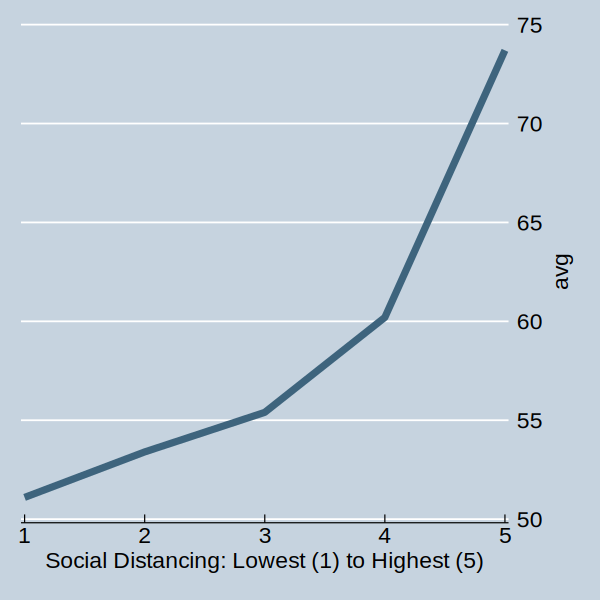

In [760]:
// Comparing Primary Care Physicians per 100,000 population to social distancing
modelrun pcp_rate

Graph above: Comparing **Primary Care Physicians** per 100,000 population to social distancing


---

# Mental Health Providers

For people sequestered at home, mental health providers may play an emerging role. These data are from CMS National Provider Identification (NPI) via [RWJF](https://www.countyhealthrankings.org/explore-health-rankings/measures-data-sources/2020-measures). It is expressed in rates per 100,000 population.

----- BASE MODEL -----
note: mhproviders_rate has noninteger values

Iteration 0:   log likelihood =  -134063.9  
Iteration 1:   log likelihood = -132231.58  
Iteration 2:   log likelihood = -132226.73  
Iteration 3:   log likelihood = -132226.73  

-------------------------------------------------------------------------------
              |                 OIM
mhproviders~e |        IRR   Std. Err.      z    P>|z|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
      levels1 |   150.9811   7.793009    97.20   0.000     136.4542    167.0544
      levels2 |    133.202   7.220699    90.24   0.000     119.7756    148.1335
      levels3 |   139.4714    7.29997    94.34   0.000     125.8732    154.5387
      levels4 |   151.0593    7.67076    98.81   0.000     136.7489    166.8674
      levels5 |   218.9843   9.071668   130.09   0.000     201.9068    237.5062
--------------------------------------------------------------------------

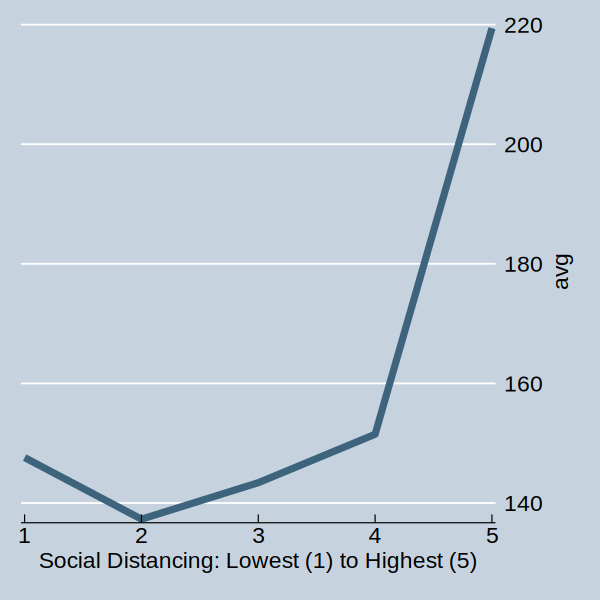

In [761]:
// Comparing mental health provider rate to social distancing
modelrun mhproviders_rate

Graph above: Comparing **mental health provider rate per 100k** to social distancing


---
# Health Insurance

Getting hospitalized for Covid-19 is sure to be expensive. After hearing that even some front line nurses in pulmonary infectious disease units in North Carolina do not have health insurance, we wanted to see if there was any association between health insurance status and social distancing. 

----- BASE MODEL -----
note: uninsured_p has noninteger values

Iteration 0:   log likelihood = -6340.6702  
Iteration 1:   log likelihood = -6333.9193  
Iteration 2:   log likelihood = -6333.9184  
Iteration 3:   log likelihood = -6333.9184  

------------------------------------------------------------------------------
             |                 OIM
 uninsured_p |        IRR   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     levels1 |   13.45712    .246827   141.73   0.000     12.98194    13.94969
     levels2 |   12.10383   .2354832   128.17   0.000     11.65098    12.57428
     levels3 |   11.25793   .2239142   121.73   0.000     10.82751    11.70546
     levels4 |   9.968171   .2131914   107.51   0.000      9.55896     10.3949
     levels5 |   8.341084   .1927364    91.80   0.000     7.971754    8.727525
------------------------------------------------------------------------------
(Standard

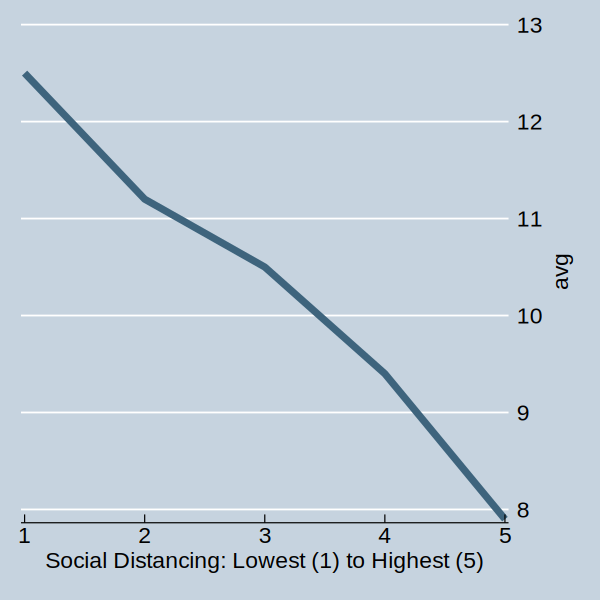

In [762]:
// Comparing percent uninsured to social distancing
modelrun uninsured_p 

Graph above: Comparing **percent uninsured** to social distancing

Alarmingly, counties with lower social distancing also had more uninsured residents!

---
# Flu Vaccination

We had a hypothesis that counties that were more involved in preventative behaviors would be more likely to self-isolate more thoroughly. To test this, we examined whether earlier flu vaccination rates impacted how much the county was likely to slow down in the current coronavirus outbreak. This is quantified as the percent of annual Medicare enrollees having an annual flu vaccination, as reported by the Robert Wood Johnson Foundation. Since the flu vaccine is free to all Medicare beneficiaries, and this is the elderly age group with the most influenza mortality, this is a convenient metric to test *a priori* how conscientious the population was, on average.




        % Medicare Beneficiaries Getting Flu Vaccine
-------------------------------------------------------------
      Percentiles      Smallest
 1%           18              9
 5%           26              9
10%           30             12       Obs               2,118
25%           37             12       Sum of Wgt.       2,118

50%           43                      Mean           41.97781
                        Largest       Std. Dev.      8.637998
75%           48             62
90%           52             62       Variance         74.615
95%           54             63       Skewness      -.6566321
99%           57             65       Kurtosis       3.322822

(bin=10, start=9, width=5.6)


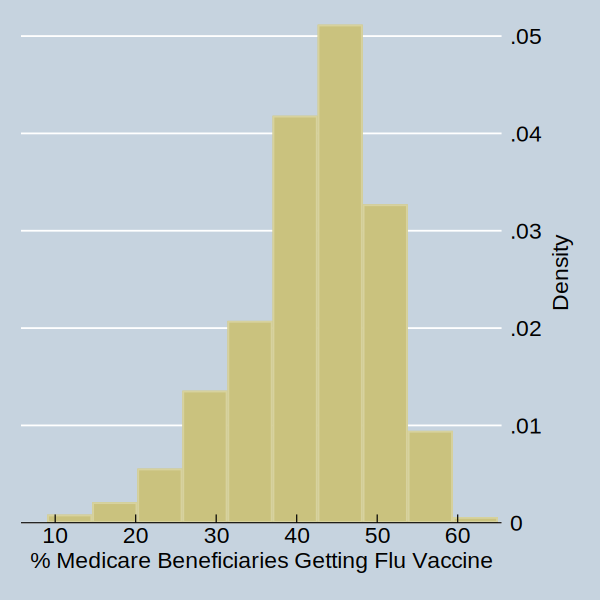

In [763]:
// Basic descriptive on background influenza vaccine
frame change default
summ fluvaccine, d
hist fluvaccine, bin(10)

----- BASE MODEL -----

Iteration 0:   log likelihood = -7851.5438  
Iteration 1:   log likelihood = -7850.2206  
Iteration 2:   log likelihood = -7850.2206  

------------------------------------------------------------------------------
             |                 OIM
  fluvaccine |        IRR   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     levels1 |   40.05938   .4055228   364.55   0.000     39.27241    40.86213
     levels2 |   40.90909    .411269   369.17   0.000     40.11091    41.72316
     levels3 |   41.65349   .4091623   379.66   0.000     40.85922     42.4632
     levels4 |   42.76134   .4199744   382.39   0.000     41.94607    43.59244
     levels5 |   44.45581    .422702   399.07   0.000     43.63501    45.29206
------------------------------------------------------------------------------
(Standard errors scaled using square root of Pearson X2-based dispersion.)
----- RURALITY-ADJU

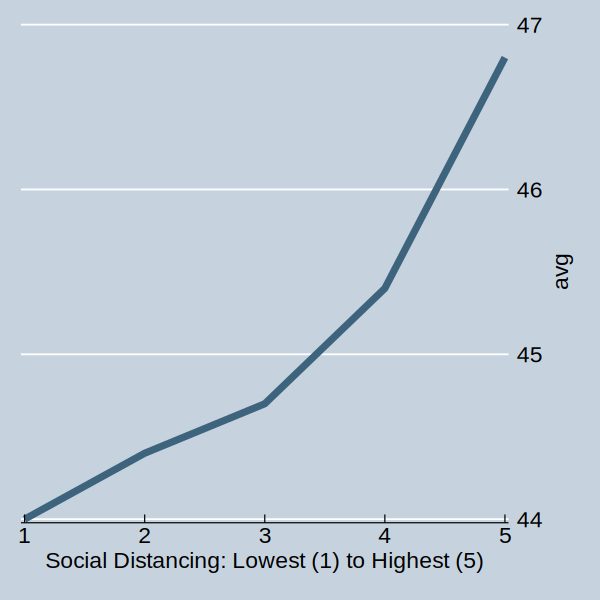

In [764]:
// Comparing background flu vaccination with current social distancing
modelrun fluvaccine

Grpah above: Comparing background **flu vaccination** with current social distancing

--- 
# Income

There is a trend emerging. So, since the places with more social distancing seem to have more health resources, perhaps there are trends in financial means? Income data are from the American Community Survey 5-year estimates via [RWJF](https://www.countyhealthrankings.org/explore-health-rankings/measures-data-sources/2020-measures).

----- BASE MODEL -----

Iteration 0:   log likelihood = -4604188.3  
Iteration 1:   log likelihood = -4598067.3  
Iteration 2:   log likelihood = -4598067.2  

------------------------------------------------------------------------------
             |                 OIM
    income80 |        IRR   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     levels1 |   86699.06   972.7195  1013.43   0.000     84813.37    88626.67
     levels2 |    89663.7   995.1093  1027.53   0.000     87734.38    91635.44
     levels3 |   94445.65   1006.949  1074.48   0.000     92492.55       96440
     levels4 |   100903.5   1053.123  1103.96   0.000     98860.35    102988.8
     levels5 |   110475.2   1089.053  1178.00   0.000     108361.2    112630.5
------------------------------------------------------------------------------
(Standard errors scaled using square root of Pearson X2-based dispersion.)
----- RURALITY-ADJU

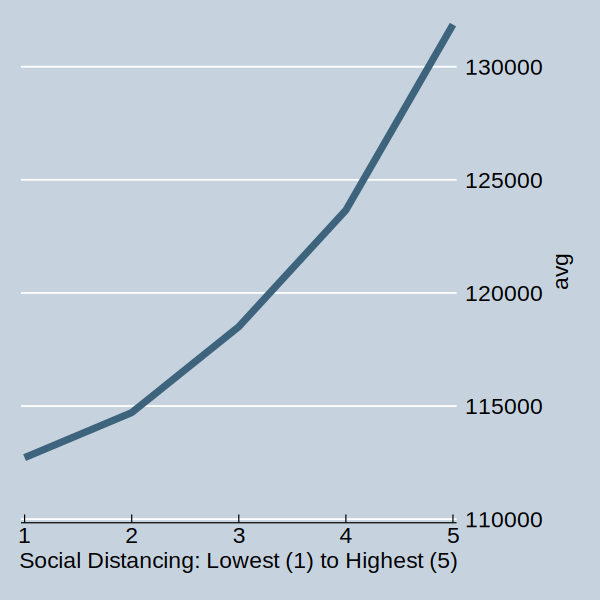

In [765]:
// Comparing 80th percentile income to social distancing
modelrun income80

Graph above: Comparing **80th percentile income** to social distancing

In [766]:
* Log transformation to handle the non-linearity of the logit from dollars
gen lnincome80=ln(income80)
ologit toptier lnincome80  i.rucc, or




Iteration 0:   log likelihood = -1069.3447  
Iteration 1:   log likelihood = -977.55284  
Iteration 2:   log likelihood = -973.03266  
Iteration 3:   log likelihood = -973.02209  
Iteration 4:   log likelihood = -973.02209  

Ordered logistic regression                     Number of obs     =      2,121
                                                LR chi2(9)        =     192.65
                                                Prob > chi2       =     0.0000
Log likelihood = -973.02209                     Pseudo R2         =     0.0901

------------------------------------------------------------------------------
     toptier | Odds Ratio   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
  lnincome80 |   23.79914   7.729811     9.76   0.000     12.59205     44.9807
             |
        rucc |
          2  |   .8589937    .163446    -0.80   0.424      .591598    1.247249
          3  |   .6763571   .

---
# Income Inequality

So places with more social distancing tend to be wealthier. What about income inequality? Is this merely a matter of have and have-nots? Or does the overall structure of society tell us something. There are many compelling ways to measure income inequality. We are using the ratio of the 80th percentile of income to the 20th percentile. Loosely interpreted, the closer to 4.0, the less inequality there is. Income data are from the American Community Survey 5-year estimates via [RWJF](https://www.countyhealthrankings.org/explore-health-rankings/measures-data-sources/2020-measures).

----- BASE MODEL -----
note: incomeratio has noninteger values

Iteration 0:   log likelihood = -3699.1448  
Iteration 1:   log likelihood = -3699.0964  
Iteration 2:   log likelihood = -3699.0964  

------------------------------------------------------------------------------
             |                 OIM
 incomeratio |        IRR   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     levels1 |   4.814769   .0357657   211.58   0.000     4.745177    4.885381
     levels2 |   4.623051   .0352554   200.77   0.000     4.554465    4.692669
     levels3 |   4.504309   .0343107   197.58   0.000     4.437561    4.572061
     levels4 |   4.412919   .0343627   190.65   0.000      4.34608    4.480785
     levels5 |   4.450192    .034104   194.81   0.000     4.383849    4.517539
------------------------------------------------------------------------------
(Standard errors scaled using square root of Pearson X

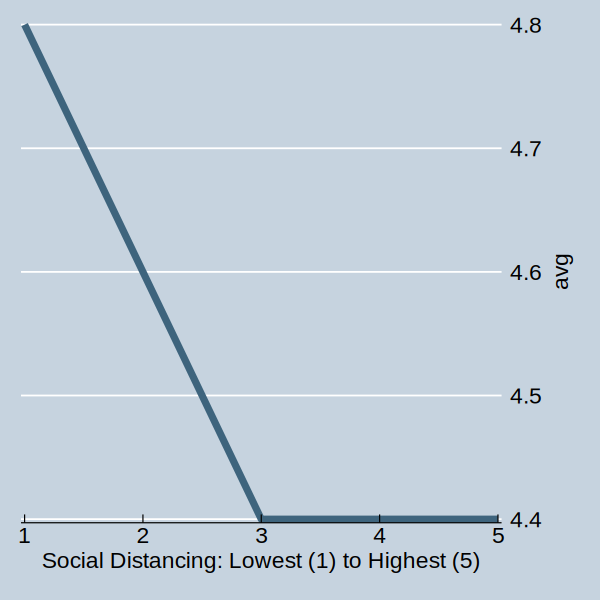

In [767]:
// Comparing income inequality to social distancing
modelrun incomeratio

---

# Exploratory analyses




----------------------------------------------------------
Distancin |
g: Lowest |
(1) to    |
Highest   |
(5)       |    N(drivea~p)  mean(drivea~p)   sem(drivea~p)
----------+-----------------------------------------------
        1 |            423       81.938835        .2909272
        2 |            418       81.868483        .2047703
        3 |            430         81.2346        .2224286
        4 |            420       80.473237        .2524533
        5 |            430       77.476386        .4300229
----------------------------------------------------------


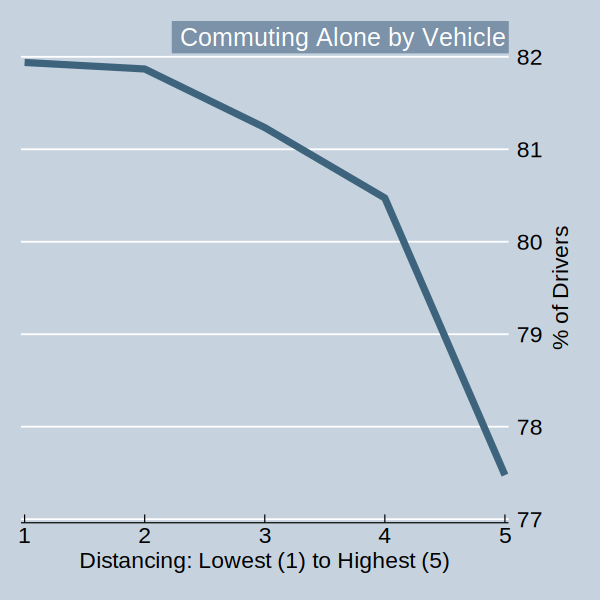

In [768]:
frame change default
foreach var of varlist drivealone_p {
    table iso5, c(count `var' mean `var' sem `var')
        frame put `var' iso5, into(`var')
            frame change `var'
                collapse (mean) `var', by(iso5)
                    la var `var' "% of Drivers"
                        line `var' iso5, note("Commuting Alone by Vehicle")  
                            frame change default
                                frame drop `var'
}

---





----------------------------------------------
Distancin |
g: Lowest |
(1) to    |
Highest   |
(5)       |    N(rucc)  mean(rucc)   sem(rucc)
----------+-----------------------------------
        1 |        423   5.2553191     .106704
        2 |        418   4.7703347    .1178277
        3 |        430   4.4255815    .1173218
        4 |        420   3.9761906    .1194696
        5 |        430   3.5976744    .1207886
----------------------------------------------


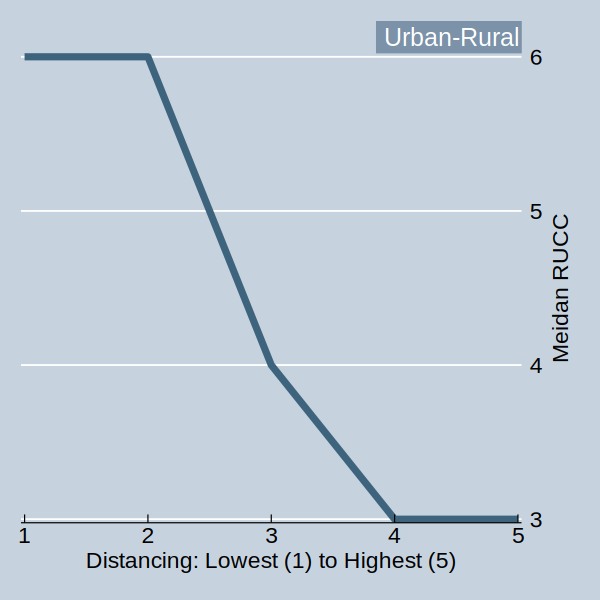

In [769]:
frame change default
foreach var of varlist rucc {
    table iso5, c(count `var' mean `var' sem `var')
        frame put `var' iso5, into(`var')
            frame change `var'
                collapse (median) `var', by(iso5)
                    la var `var' "Meidan RUCC"
                        line `var' iso5, note("Urban-Rural")   
                            frame change default
                                frame drop `var'
}




----------------------------------------------------------
Distancin |
g: Lowest |
(1) to    |
Highest   |
(5)       |    N(longco~p)  mean(longco~p)   sem(longco~p)
----------+-----------------------------------------------
        1 |            423       27.683688        .6089129
        2 |            418       31.429904        .5883851
        3 |            430       32.143023         .599011
        4 |            420       33.164762        .5677307
        5 |            430       32.825349        .5610897
----------------------------------------------------------


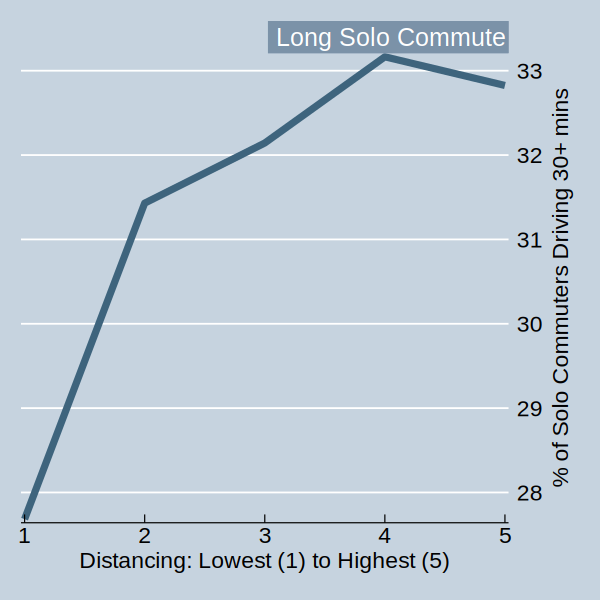

In [770]:
frame change default
foreach var of varlist longcommute_p {
    table iso5, c(count `var' mean `var' sem `var')
        frame put `var' iso5, into(`var')
            frame change `var'
                collapse (mean) `var', by(iso5)
                    la var `var' "% of Solo Commuters Driving 30+ mins"
                        line `var' iso5, note("Long Solo Commute")     
                            frame change default
                                frame drop `var'
}

----- BASE MODEL -----
note: food has noninteger values

Iteration 0:   log likelihood =  -4223.533  
Iteration 1:   log likelihood = -4223.4823  
Iteration 2:   log likelihood = -4223.4823  

------------------------------------------------------------------------------
             |                 OIM
        food |        IRR   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     levels1 |   7.075772   .0468451   295.55   0.000      6.98455    7.168185
     levels2 |   7.359518   .0481192   305.27   0.000     7.265808    7.454437
     levels3 |   7.564789   .0481517   317.90   0.000     7.470999    7.659755
     levels4 |   7.723501   .0491764   321.07   0.000     7.627716    7.820489
     levels5 |   8.045775   .0496589   337.84   0.000     7.949031    8.143695
------------------------------------------------------------------------------
(Standard errors scaled using square root of Pearson X2-based

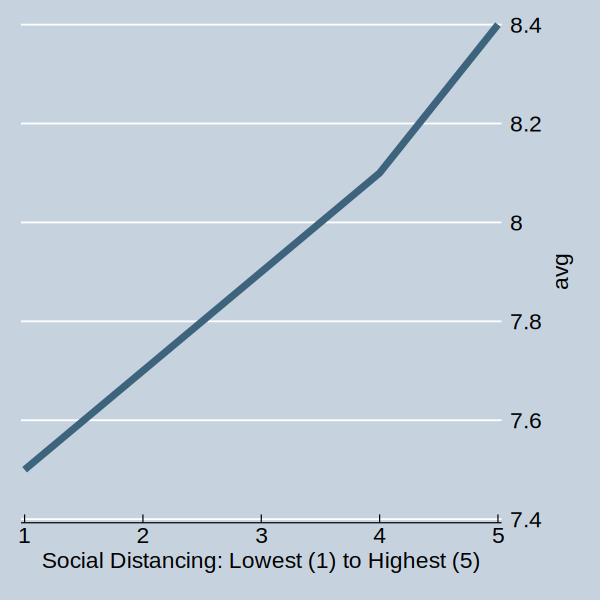

In [771]:
modelrun food

----- BASE MODEL -----
note: physicalinactive has noninteger values

Iteration 0:   log likelihood = -6378.2058  
Iteration 1:   log likelihood = -6377.3676  
Iteration 2:   log likelihood = -6377.3676  

-------------------------------------------------------------------------------
              |                 OIM
physicalina~e |        IRR   Std. Err.      z    P>|z|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
      levels1 |   28.26927   .2486252   379.97   0.000     27.78615    28.76079
      levels2 |   27.43541   .2463914   368.77   0.000     26.95671     27.9226
      levels3 |   26.00233   .2364993   358.23   0.000      25.5429    26.47001
      levels4 |   24.29286   .2312984   335.06   0.000     23.84372    24.75045
      levels5 |   22.16116   .2183334   314.49   0.000     21.73734    22.59325
-------------------------------------------------------------------------------
(Standard errors scaled using square ro

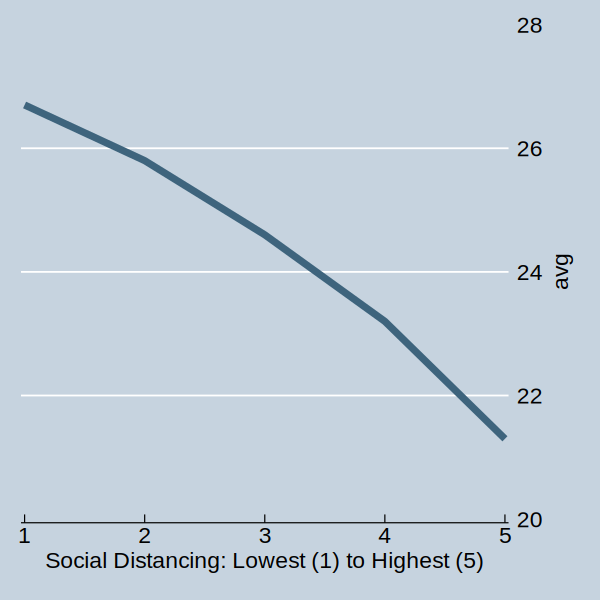

In [772]:
modelrun physicalinactive

----- BASE MODEL -----
note: exercise has noninteger values

Iteration 0:   log likelihood = -14125.506  
Iteration 1:   log likelihood = -14111.911  
Iteration 2:   log likelihood =  -14111.91  

------------------------------------------------------------------------------
             |                 OIM
    exercise |        IRR   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     levels1 |   57.54675   .9255991   251.96   0.000      55.7609    59.38979
     levels2 |   60.48216    .954571   259.93   0.000     58.63988    62.38232
     levels3 |   63.98065   .9679943   274.87   0.000     62.11127     65.9063
     levels4 |   69.88463   1.023644   289.93   0.000     67.90685    71.92001
     levels5 |   77.69943   1.066737   317.05   0.000     75.63654    79.81858
------------------------------------------------------------------------------
(Standard errors scaled using square root of Pearson X2-b

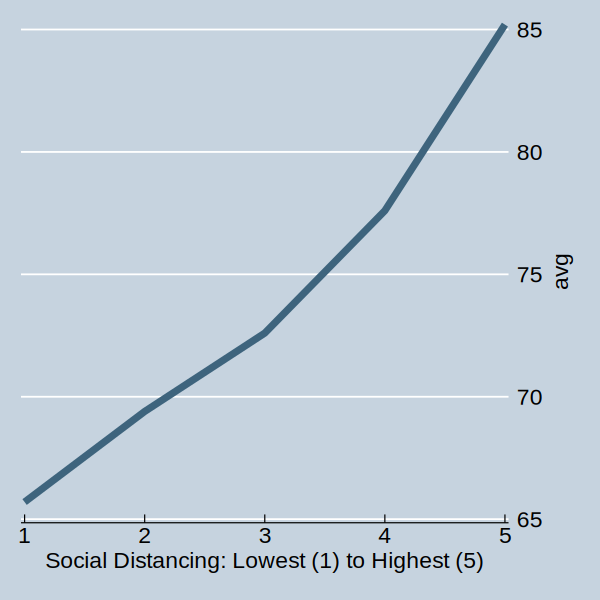

In [773]:
modelrun exercise

---

# RWJF Composite rankings

Controlling for state by looking at rankings within state

----- BASE MODEL -----

Iteration 0:   log likelihood = -40041.105  
Iteration 1:   log likelihood = -39633.162  
Iteration 2:   log likelihood = -39632.427  
Iteration 3:   log likelihood = -39632.427  

------------------------------------------------------------------------------
             |                 OIM
lengthoflife |        IRR   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     levels1 |   56.13507   2.206785   102.46   0.000     51.97228    60.63128
     levels2 |   55.02153   2.195216   100.45   0.000     50.88291    59.49677
     levels3 |   50.74651   2.078586    95.87   0.000      46.8318    54.98846
     levels4 |   46.52857   2.013884    88.72   0.000     42.74422    50.64797
     levels5 |   31.36744   1.634197    66.14   0.000     28.32258    34.73965
------------------------------------------------------------------------------
(Standard errors scaled using square root of Pear

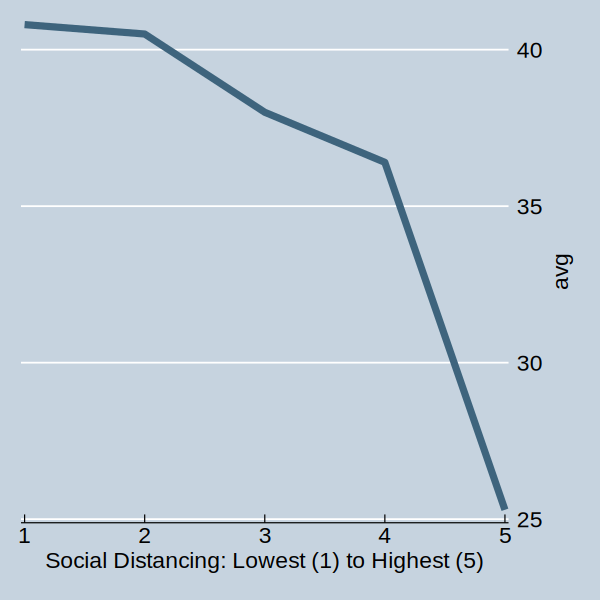

In [774]:
modelrun lengthoflife

----- BASE MODEL -----

Iteration 0:   log likelihood =  -39923.52  
Iteration 1:   log likelihood = -39536.504  
Iteration 2:   log likelihood =  -39535.84  
Iteration 3:   log likelihood =  -39535.84  

-------------------------------------------------------------------------------
              |                 OIM
qualityoflife |        IRR   Std. Err.      z    P>|z|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
      levels1 |   58.13033   2.262207   104.40   0.000     53.86136    62.73765
      levels2 |    54.2512   2.195855    98.67   0.000     50.11368    58.73031
      levels3 |   51.63488   2.112149    96.42   0.000     47.65675    55.94509
      levels4 |   46.14524   2.020347    87.52   0.000     42.35057    50.27991
      levels5 |   33.39302    1.69856    68.97   0.000     30.22448    36.89374
-------------------------------------------------------------------------------
(Standard errors scaled using square ro

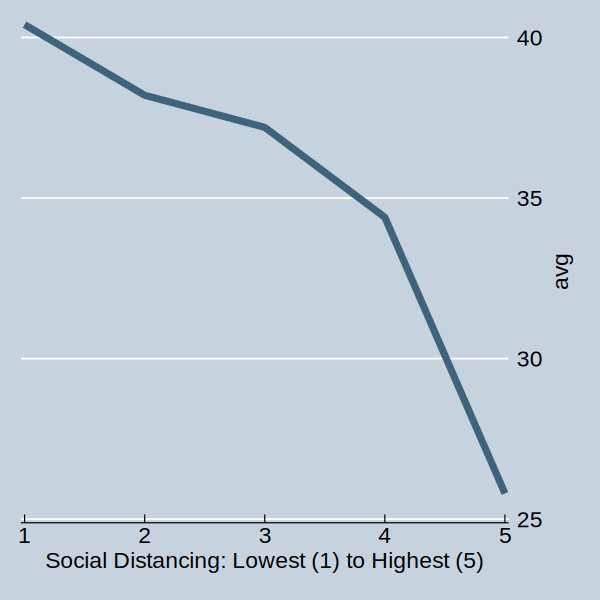

In [775]:
modelrun qualityoflife

----- BASE MODEL -----

Iteration 0:   log likelihood = -40537.387  
Iteration 1:   log likelihood = -40129.715  
Iteration 2:   log likelihood = -40128.987  
Iteration 3:   log likelihood = -40128.987  

-------------------------------------------------------------------------------
              |                 OIM
healthbehav~s |        IRR   Std. Err.      z    P>|z|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
      levels1 |   59.28436   2.282272   106.04   0.000     54.97578    63.93061
      levels2 |   55.50239   2.218816   100.47   0.000      51.3196     60.0261
      levels3 |   52.83721   2.134466    98.21   0.000     48.81506    57.19076
      levels4 |   46.59286   2.028097    88.25   0.000      42.7827    50.74234
      levels5 |   31.94651   1.659706    66.68   0.000     28.85368    35.37086
-------------------------------------------------------------------------------
(Standard errors scaled using square ro

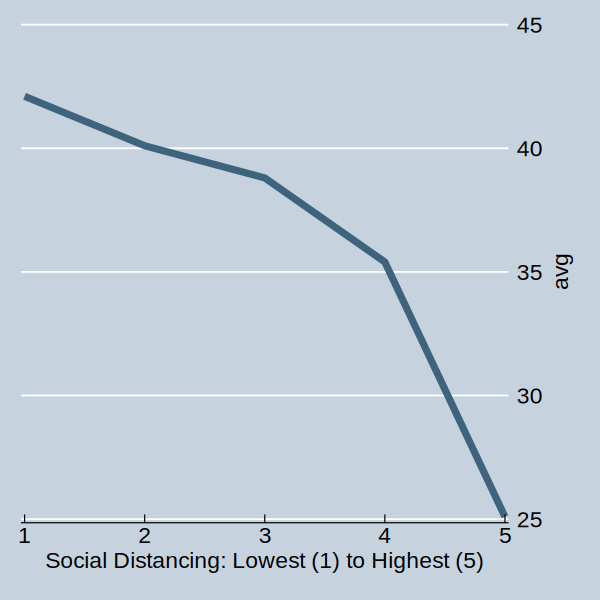

In [776]:
modelrun healthbehaviors

----- BASE MODEL -----

Iteration 0:   log likelihood = -40874.253  
Iteration 1:   log likelihood = -40460.013  
Iteration 2:   log likelihood = -40459.246  
Iteration 3:   log likelihood = -40459.246  

------------------------------------------------------------------------------
             |                 OIM
clinicalcare |        IRR   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     levels1 |     54.891   2.201161    99.88   0.000     50.74198    59.37926
     levels2 |   52.89474   2.171079    96.68   0.000     48.80616    57.32582
     levels3 |       50.6   2.093624    94.84   0.000     46.65855     54.8744
     levels4 |   44.77857    1.99282    85.42   0.000     41.03822    48.85984
     levels5 |   33.04419   1.691885    68.32   0.000     29.88911    36.53231
------------------------------------------------------------------------------
(Standard errors scaled using square root of Pear

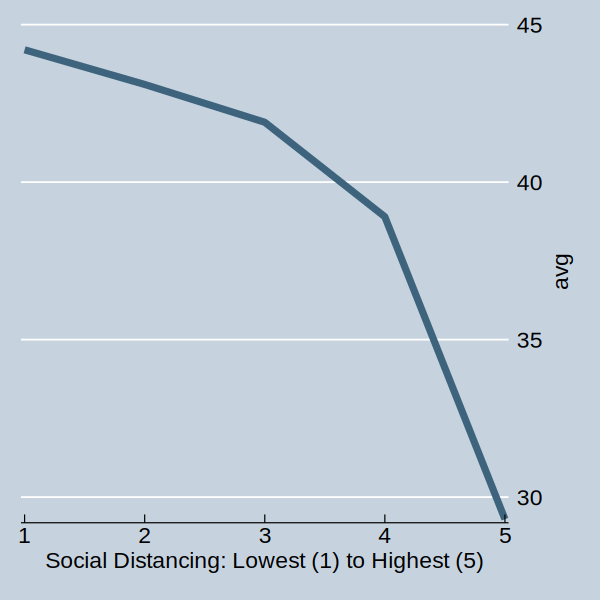

In [777]:
modelrun clinicalcare

----- BASE MODEL -----

Iteration 0:   log likelihood = -40785.009  
Iteration 1:   log likelihood = -40387.903  
Iteration 2:   log likelihood = -40387.202  
Iteration 3:   log likelihood = -40387.202  

------------------------------------------------------------------------------
             |                 OIM
         ses |        IRR   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     levels1 |   55.27014   2.219638    99.91   0.000     51.08654    59.79635
     levels2 |   53.46651   2.193541    96.99   0.000     49.33556    57.94335
     levels3 |   52.76512   2.148485    97.40   0.000     48.71781    57.14866
     levels4 |      47.45   2.061515    88.84   0.000     43.57675    51.66751
     levels5 |   34.47209   1.736571    70.27   0.000     31.23111    38.04941
------------------------------------------------------------------------------
(Standard errors scaled using square root of Pear

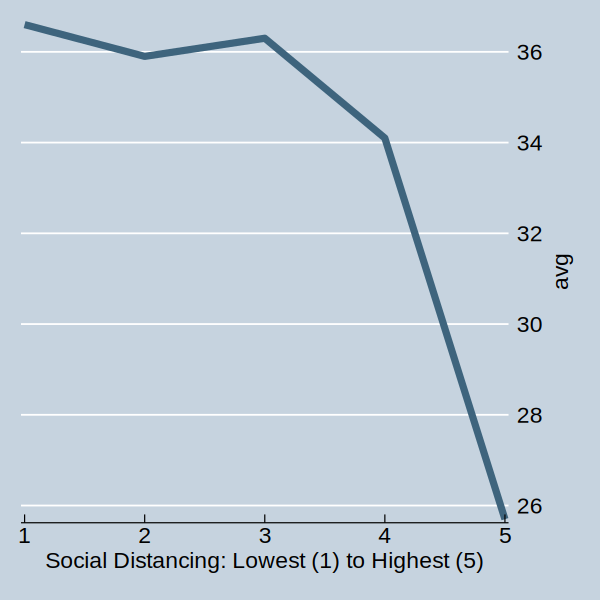

In [778]:
modelrun ses

----- BASE MODEL -----

Iteration 0:   log likelihood = -40185.257  
Iteration 1:   log likelihood = -39820.078  
Iteration 2:   log likelihood = -39819.523  
Iteration 3:   log likelihood = -39819.523  

-------------------------------------------------------------------------------
              |                 OIM
physicalenv~t |        IRR   Std. Err.      z    P>|z|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
      levels1 |   52.64218   2.128507    98.03   0.000      48.6314    56.98374
      levels2 |   58.25359   2.249768   105.25   0.000     54.00688    62.83423
      levels3 |   56.61628   2.186759   104.50   0.000     52.48852    61.06865
      levels4 |   53.72619   2.155425    99.30   0.000     49.66346    58.12128
      levels5 |   37.38837   1.777045    76.19   0.000     34.06273     41.0387
-------------------------------------------------------------------------------
(Standard errors scaled using square ro

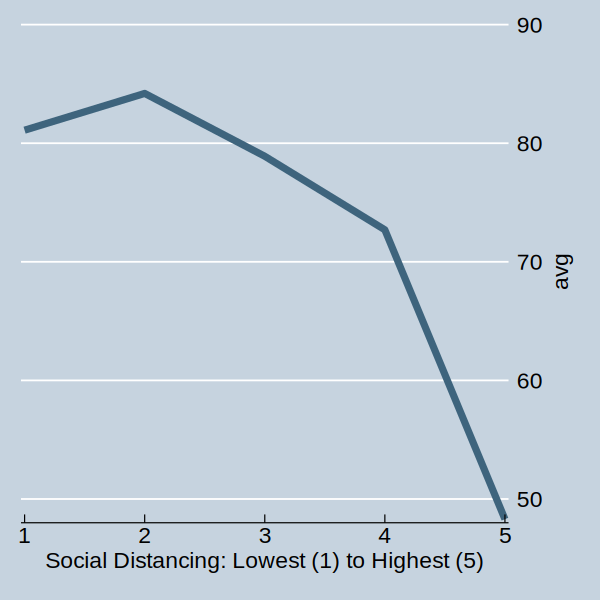

In [779]:
modelrun physicalenvironment

----- BASE MODEL -----

Iteration 0:   log likelihood = -3434.4475  
Iteration 1:   log likelihood =    -3432.6  
Iteration 2:   log likelihood = -3432.5997  

-------------------------------------------------------------------------------
              |                 OIM
lengthoflif~q |        IRR   Std. Err.      z    P>|z|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
      levels1 |    2.57109   .0560771    43.30   0.000     2.463497    2.683382
      levels2 |   2.495215   .0555072    41.10   0.000     2.388761    2.606414
      levels3 |   2.455814   .0542934    40.64   0.000     2.351674    2.564566
      levels4 |   2.397619   .0542811    38.63   0.000     2.293556    2.506404
      levels5 |   2.351163    .053124    37.84   0.000     2.249314    2.457624
-------------------------------------------------------------------------------
(Standard errors scaled using square root of Pearson X2-based dispersion.)
----- RUR

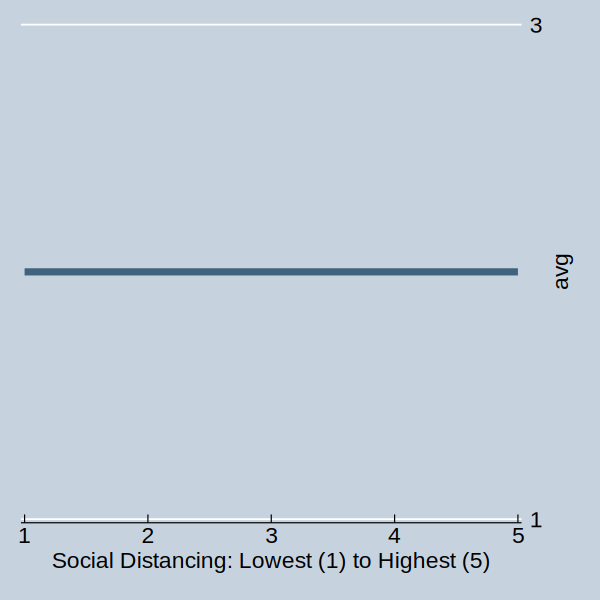

----- BASE MODEL -----

Iteration 0:   log likelihood = -3444.1086  
Iteration 1:   log likelihood = -3442.3496  
Iteration 2:   log likelihood = -3442.3493  

-------------------------------------------------------------------------------
              |                 OIM
qualityofli~q |        IRR   Std. Err.      z    P>|z|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
      levels1 |   2.635071   .0561233    45.49   0.000     2.527336    2.747399
      levels2 |   2.521531    .055163    42.28   0.000     2.415699       2.632
      levels3 |   2.534884   .0545316    43.24   0.000     2.430226    2.644049
      levels4 |   2.392857   .0536089    38.94   0.000     2.290059     2.50027
      levels5 |   2.383721   .0528807    39.16   0.000     2.282298    2.489652
-------------------------------------------------------------------------------
(Standard errors scaled using square root of Pearson X2-based dispersion.)
----- RUR

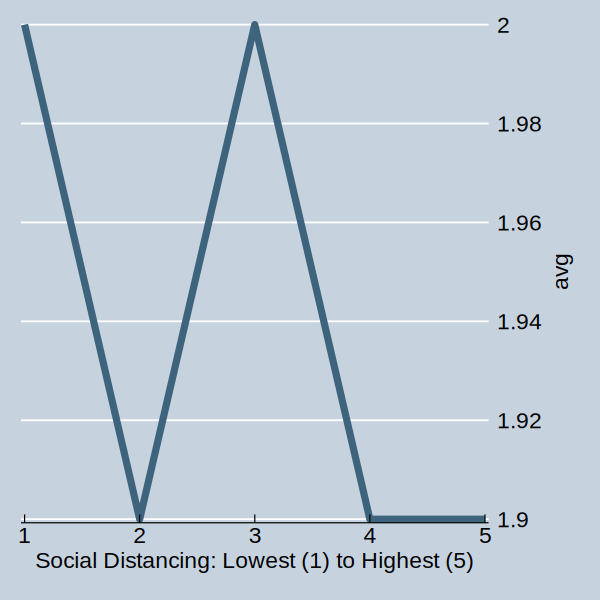

----- BASE MODEL -----

Iteration 0:   log likelihood = -3451.6897  
Iteration 1:   log likelihood = -3449.8962  
Iteration 2:   log likelihood = -3449.8959  

-------------------------------------------------------------------------------
              |                 OIM
healthbehav~q |        IRR   Std. Err.      z    P>|z|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
      levels1 |   2.663507   .0566218    46.08   0.000     2.554811    2.776828
      levels2 |   2.545455   .0556169    42.76   0.000     2.438749     2.65683
      levels3 |   2.569768   .0550967    44.02   0.000     2.464018    2.680056
      levels4 |   2.392857   .0537955    38.81   0.000     2.289709    2.500652
      levels5 |   2.341861   .0525967    37.89   0.000     2.241009    2.447251
-------------------------------------------------------------------------------
(Standard errors scaled using square root of Pearson X2-based dispersion.)
----- RUR

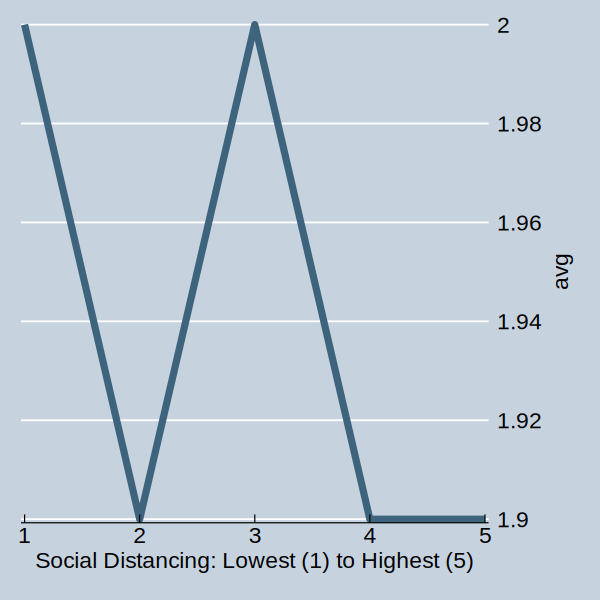

----- BASE MODEL -----

Iteration 0:   log likelihood = -3420.4017  
Iteration 1:   log likelihood = -3418.5038  
Iteration 2:   log likelihood = -3418.5034  

-------------------------------------------------------------------------------
              |                 OIM
clinicalcar~q |        IRR   Std. Err.      z    P>|z|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
      levels1 |   2.495261   .0554666    41.14   0.000     2.388882    2.606376
      levels2 |     2.4689   .0554362    40.25   0.000     2.362603    2.579979
      levels3 |   2.409302   .0539935    39.24   0.000     2.305768    2.517486
      levels4 |       2.35    .053956    37.21   0.000     2.246593    2.458167
      levels5 |   2.351163   .0533381    37.68   0.000     2.248912    2.458063
-------------------------------------------------------------------------------
(Standard errors scaled using square root of Pearson X2-based dispersion.)
----- RUR

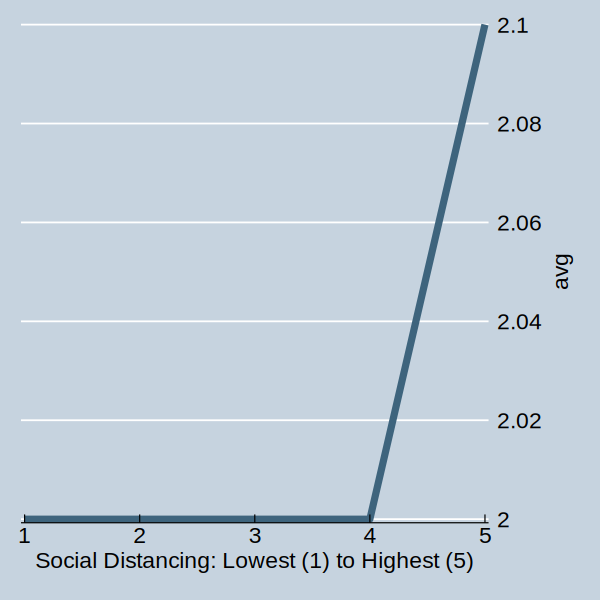

----- BASE MODEL -----

Iteration 0:   log likelihood = -3446.5101  
Iteration 1:   log likelihood = -3444.7355  
Iteration 2:   log likelihood = -3444.7352  

------------------------------------------------------------------------------
             |                 OIM
       ses_q |        IRR   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     levels1 |   2.518957    .055021    42.30   0.000     2.413394    2.629138
     levels2 |        2.5   .0550752    41.59   0.000     2.394352     2.61031
     levels3 |   2.569768   .0550538    44.05   0.000     2.464098    2.679968
     levels4 |   2.419048   .0540471    39.54   0.000     2.315403    2.527332
     levels5 |   2.439535   .0536406    40.56   0.000     2.336635    2.546967
------------------------------------------------------------------------------
(Standard errors scaled using square root of Pearson X2-based dispersion.)
----- RURALITY-ADJU

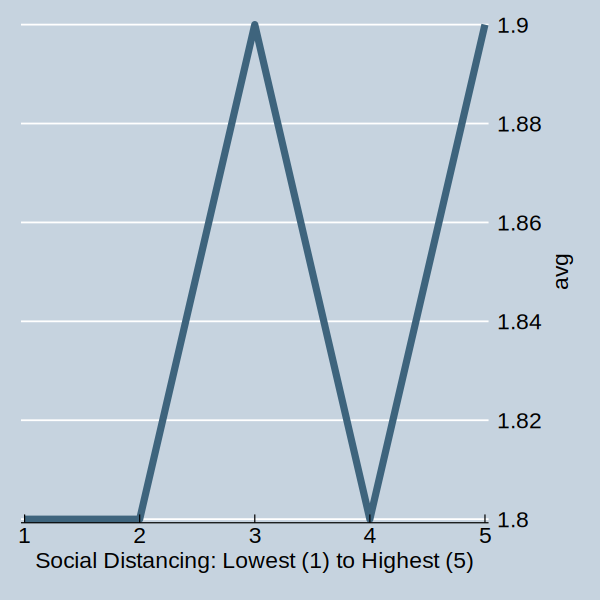

In [780]:
modelrun lengthoflife_q qualityoflife_q healthbehaviors_q clinicalcare_q ses_q

---
# Google location context

----- BASE MODEL -----
note: subunit_work has noninteger values

Iteration 0:   log likelihood = -7140.2969  
Iteration 1:   log likelihood = -7138.2495  
Iteration 2:   log likelihood = -7138.2495  

------------------------------------------------------------------------------
             |                 OIM
subunit_work |        IRR   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     levels1 |    30.8852   .3877164   273.25   0.000     30.13457    31.65454
     levels2 |   31.93532   .3893181   284.12   0.000     31.18132    32.70756
     levels3 |   32.54156   .3954631   286.57   0.000     31.77563    33.32596
     levels4 |    34.6943   .4141116   297.13   0.000     33.89208    35.51551
     levels5 |   38.04627   .4319796   320.48   0.000     37.20896    38.90243
------------------------------------------------------------------------------
(Standard errors scaled using square root of Pearson 

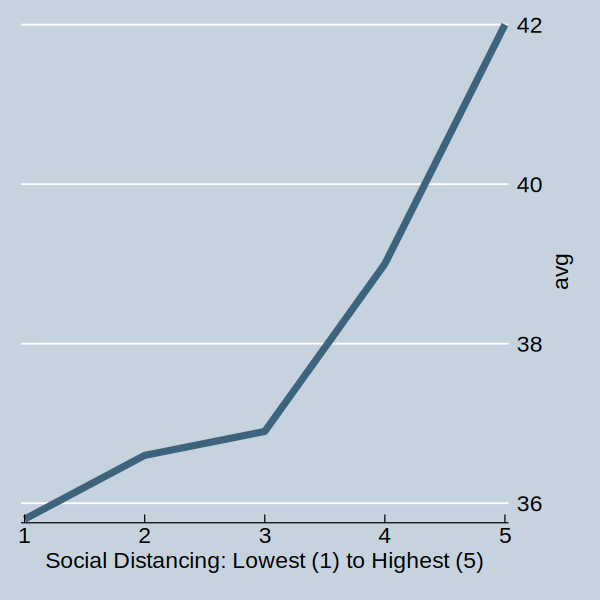

In [781]:
modelrun subunit_work


(306 missing values generated)

----- BASE MODEL -----

Iteration 0:   log likelihood = -7237.0058  
Iteration 1:   log likelihood = -7236.9764  
Iteration 2:   log likelihood = -7236.9764  

-------------------------------------------------------------------------------
              |                 OIM
subunit_r~200 |        IRR   Std. Err.      z    P>|z|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
      levels1 |   239.6073   .6638062  1977.70   0.000     238.3098    240.9119
      levels2 |   237.5833   .6448065  2015.65   0.000     236.3229    238.8505
      levels3 |   240.4118   .6621199  1990.61   0.000     239.1175     241.713
      levels4 |   243.2639   .6632549  2015.10   0.000     241.9674    244.5673
      levels5 |   248.0108   .6588046  2075.58   0.000     246.7229    249.3054
-------------------------------------------------------------------------------
(Standard errors scaled using square root of Pearso

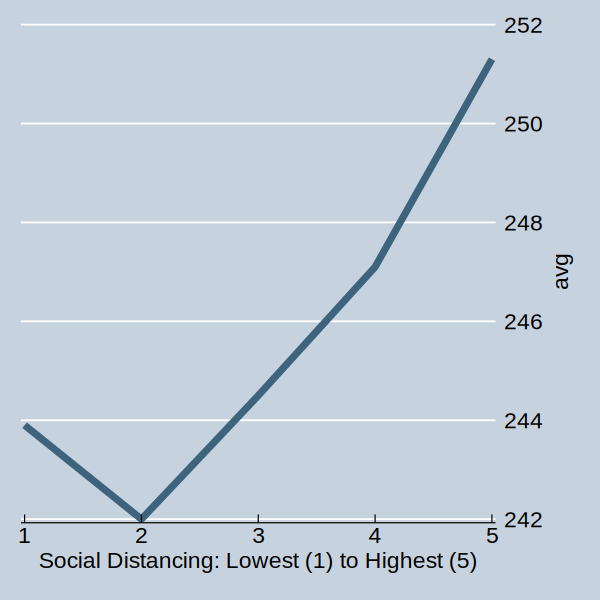

In [782]:
gen subunit_retail200 = subunit_retail + 200

modelrun subunit_retail200

In [783]:
frame change results

list, sepby(strat)




     +--------------------------------------------------------------+
     |               strat   level        avg         LL         UL |
     |--------------------------------------------------------------|
  1. |            pcp_rate       1       51.1       47.1       55.5 |
  2. |            pcp_rate       2       53.4       49.3       57.7 |
  3. |            pcp_rate       3       55.4       51.4       59.6 |
  4. |            pcp_rate       4       60.2       56.1       64.6 |
  5. |            pcp_rate       5       73.7       69.3       78.5 |
     |--------------------------------------------------------------|
  6. |    mhproviders_rate       1      147.6      127.3      171.2 |
  7. |    mhproviders_rate       2      137.3      118.6        159 |
  8. |    mhproviders_rate       3      143.4      124.8      164.8 |
  9. |    mhproviders_rate       4      151.5      132.6      172.9 |
 10. |    mhproviders_rate       5      219.4      196.1      245.5 |
     |-----------

---

# RWJF Composite rank tests



In [784]:
frame change default
foreach var of varlist lengthoflife_q qualityoflife_q healthbehaviors_q clinicalcare_q ses_q physicalenvironment_q {
di "."
di "."
di "."
di "`var'"
kwallis `var', by(toptier)

}





.
.
.
lengthoflife_q

Kruskal-Wallis equality-of-populations rank test

  +-----------------------------+
  | toptier |   Obs |  Rank Sum |
  |---------+-------+-----------|
  |       0 | 1,690 |  1.82e+06 |
  |       1 |   430 | 432266.00 |
  +-----------------------------+

chi-squared =     4.391 with 1 d.f.
probability =     0.0361

chi-squared with ties =     4.688 with 1 d.f.
probability =     0.0304
.
.
.
qualityoflife_q

Kruskal-Wallis equality-of-populations rank test

  +-----------------------------+
  | toptier |   Obs |  Rank Sum |
  |---------+-------+-----------|
  |       0 | 1,690 |  1.82e+06 |
  |       1 |   430 | 430827.00 |
  +-----------------------------+

chi-squared =     4.940 with 1 d.f.
probability =     0.0262

chi-squared with ties =     5.269 with 1 d.f.
probability =     0.0217
.
.
.
healthbehaviors_q

Kruskal-Wallis equality-of-populations rank test

  +-----------------------------+
  | toptier |   Obs |  Rank Sum |
  |---------+-------+-----------|


In [785]:
foreach var of varlist lengthoflife_q qualityoflife_q healthbehaviors_q clinicalcare_q ses_q physicalenvironment_q {
di "."
di "."
di "."
di "`var'"
ologit iso5 `var' i.rucc, or
}


.
.
.
lengthoflife_q

Iteration 0:   log likelihood = -3411.8576  
Iteration 1:   log likelihood = -3323.7061  
Iteration 2:   log likelihood = -3323.3469  
Iteration 3:   log likelihood = -3323.3468  

Ordered logistic regression                     Number of obs     =      2,120
                                                LR chi2(9)        =     177.02
                                                Prob > chi2       =     0.0000
Log likelihood = -3323.3468                     Pseudo R2         =     0.0259

-------------------------------------------------------------------------------
         iso5 | Odds Ratio   Std. Err.      z    P>|z|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
lengthoflif~q |   .9912496   .0355544    -0.25   0.806     .9239573    1.063443
              |
         rucc |
           2  |   .5075057   .0705968    -4.88   0.000     .3863974     .666573
           3  |     .33182     .04852    -7.54 